## DeLong and Olney Macroeconomics 3rd Edition ch 5.2: Modern Economic Growth in America

## Setting up the Python/Jupyter environment

In [1]:
%%javascript

IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;}

<IPython.core.display.Javascript object>

In [2]:
# keep output cells from shifting to autoscroll: little scrolling
# subwindows within the notebook are an annoyance...

In [3]:
# set up the environment by reading in every library we might need: 
# os... graphics... data manipulation... time... math... statistics...

import sys
import os
from urllib.request import urlretrieve

import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import Image

import pandas as pd
from pandas import DataFrame, Series
from datetime import datetime

import scipy as sp
import numpy as np
import math
import random

import seaborn as sns
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

# report library versions...

/Users/delong/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
%matplotlib inline 

# put graphs into the notebook itself...

In [5]:
# graphics setup: seaborn-whitegrid and figure size...

plt.style.use('seaborn-whitegrid')

figure_size = plt.rcParams["figure.figsize"]
figure_size[0] = 12
figure_size[1] = 9
plt.rcParams["figure.figsize"] = figure_size

# 5.2 Modern Economic Growth in America

Before 1500 human material standards of living and productivity levels across the globe rose at perhaps 0.01 percent per year. Between 1500 and 1800 they rose faster in the areas that were to become the industrial core of the modern world economy—first northwestern Europe. and then northwestern Europe’s settler colonies in North America—rising at a rate of perhaps a quarter of a percent per year. The United Kingdom of Great Britain and (then) Ireland, for which we do have at least somewhat trustworthy estimates, sees its estimated level of real GDP per capita rise at 0.27 percent per year from 1700 to 1780.

The first half of the nineteenth century then saw leading-edge economies’ levels of productivity accelerate. Britain saw estimated real GDP per capits growth from 1780 to 1860 at about 0.60 percent per year. And the second half saw a still further acceleration, with British growth rising to 0.95 percent per year over 1860 to 1913.

Using the _rule of 72_ (or your knowledge of the exponential function and either the Google search box <http://google.com> or Wolfram Alpha <http://wolframalpha.com>), you can calculate that at the eighteenth century pace the doubling time for British real GDP per capita was 267 years; at the first half of the nineteenth century pace the doubling time was 120 years; and for the late nineteenth century pace the doubling time was 75 years. This was not the thirty- to forty-year doubling time that we got used to during the twentieth century's era of modern economic growth: the era in which it was accepted that each generation's productivity would be within shouting distance of twice and its lifestyle transformed relative to its predecessor. But starting in 1780 began the era in which people looking back over a lifetime would see huge changes. And even those living in the seventeenth and eighteenth centuries could see significant changes that mattered for how ordinary people lived their lives, even if they were still under the Malthusian harrow.

But while Britain in the nineteenth century was becoming the workshop of the world and then the most dominant empire the world had ever seen, its former colony across the Atlantic Ocean, the United States of America, was catching up to, overtaking, and then surpassing it in industry and productivity levels. Already in the 1850s observers were reporting to the British Parliament that in manufacturing "the American methods... were worth further investigation" and that labor productivity was very high because "on account of the high price of labour the whole energy of the people is directed to improving and inventing labour-saving machinery..." Initially, the American edge appeared concentrated in two types of activities: first, making products in which America's raw material abundance was greatest, of which woodworking took the lead; second, as MIT's Peter Temin said, "wood screws, locks, clocks, and small arms... industries all produc[ing] light, highly fabricated products made on a standardized basis and, if they had parts, with interchangeable parts. The introduction of machinery in this group of industries cannot be separated from the standardization of products and parts..."

Thus we concentrate for modern economic growth over time on the United States of America.

In [33]:
# British real GDP per capita doubling times

print(72/0.27, "doubling time: 1700-1780")
print(72/0.60, "doubling time: 1780-1860")
print(72/0.95, "doubling time: 1860-1913")

266.66666666666663 doubling time: 1700-1780
120.0 doubling time: 1780-1860
75.78947368421053 doubling time: 1860-1913


In [ ]:
# British long run real GDP per capita growth
# From Sam Williamson and Louis Johnston, Measuring Worth
# Data

sourceURL = "http://delong.typepad.com/2018-02-18_ukgdp_1700-2017.csv"
uklongrun_df = pd.read_csv(sourceURL, index_col = 0)

uklongrun_dict = {}
uklongrun_dict["df"] = uklongrun_df
uklongrun_dict["sourceURL"] = sourceURL
uklongrun_dict["sourceDescription"] = "Ryland Thomas and Samuel H. Williamson, 'What Was the Consistent U.K. GDP Then?' MeasuringWorth 2018"   
uklongrun_dict["sourceNotes"] = "http://www.measuringworth.com/ukgdp/"

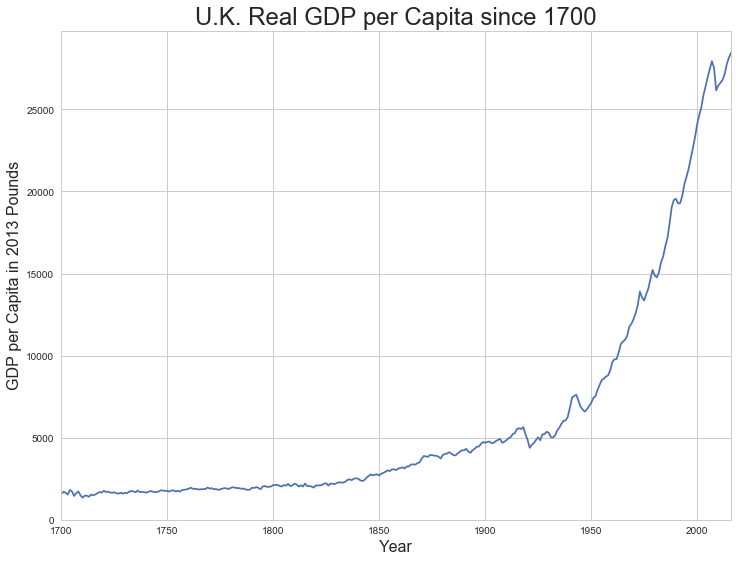

In [26]:
# Long run growth: British real GDP per capita: level plot

uklongrun_df.Real2013_GDP_per_Capita.plot()
plt.ylim(0, )
plt.ylabel("GDP per Capita in 2013 Pounds", size=16)
plt.xlabel("Year", size=16)
plt.title("U.K. Real GDP per Capita since 1700", size = 24)

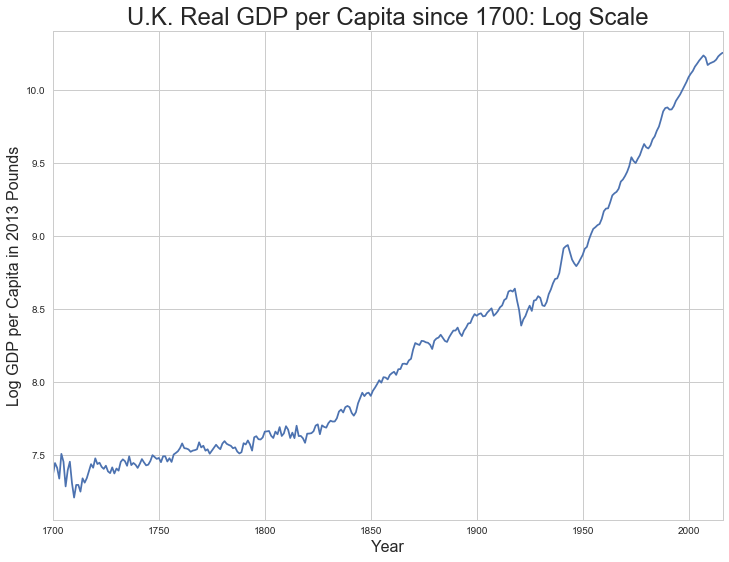

In [27]:
# Long run growth: British real GDP per capita: log plot

np.log(uklongrun_df.Real2013_GDP_per_Capita).plot()
plt.ylabel("Log GDP per Capita in 2013 Pounds", size=16)
plt.xlabel("Year", size=16)
plt.title("U.K. Real GDP per Capita since 1700: Log Scale", size = 24)

In [29]:
# for reference: British real GDP per capita growth rates

print(
    (np.log(uklongrun_df.Real2013_GDP_per_Capita[1780]/
    uklongrun_df.Real2013_GDP_per_Capita[1700])/(1780-1700)), 
    "GDP per Capita Growth Rate 1700-1780", "\n")

print(
    (np.log(uklongrun_df.Real2013_GDP_per_Capita[1860]/
    uklongrun_df.Real2013_GDP_per_Capita[1780])/(1860-1780)), 
    "GDP per Capita Growth Rate 1780-1860", "\n")

print(
    (np.log(uklongrun_df.Real2013_GDP_per_Capita[1913]/
    uklongrun_df.Real2013_GDP_per_Capita[1860])/(1913-1860)), 
    "GDP per Capita Growth Rate 1860-1913", "\n")

print(
    (np.log(uklongrun_df.Real2013_GDP_per_Capita[1952]/
    uklongrun_df.Real2013_GDP_per_Capita[1913])/(1952-1913)), 
    "GDP per Capita Growth Rate 1913-1952", "\n")

print(
    (np.log(uklongrun_df.Real2013_GDP_per_Capita[2006]/
    uklongrun_df.Real2013_GDP_per_Capita[1952])/(2006-1952)), 
    "GDP per Capita Growth Rate 1952-2006", "\n")

print(
    (np.log(uklongrun_df.Real2013_GDP_per_Capita[2016]/
    uklongrun_df.Real2013_GDP_per_Capita[2006])/(2016-2006)), 
    "GDP per Capita Growth Rate 2006-2016", "\n")

0.00267455620694 GDP per Capita Growth Rate 1700-1780 

0.00603728202393 GDP per Capita Growth Rate 1780-1860 

0.00945726225564 GDP per Capita Growth Rate 1860-1913 

0.00933577366003 GDP per Capita Growth Rate 1913-1952 

0.0239919125582 GDP per Capita Growth Rate 1952-2006 

0.00353474589917 GDP per Capita Growth Rate 2006-2016 



----

&nbsp;

## 5.2.1 The Pace of American Economic Growth

We thus focus on the pace of long-run growth in what has been the world’s leading-edge economy for more than 150 years into the past: the United States of America. Immediately below we see the level and the log of estimated real GDP per capita in dollars of the purchasing power of 2009. Back in 1790 the level of U.S. real GDP per capita stood at 1100 dollars a year. Today it stands at 51700 dollars per year. Real GDP per capita in the U.S. has thus doubled five and a half times in two and a quarter centuries: a growth rate of 1.70 percent per year, and an average doubling time of 42 years.

The log scale graph is especially useful for examining exponential growth or near exponential growth process like modern economic growth in the United States over the past two centuries. Why? Because on a log-scale graph, quantities growing at constant exponential growth rates follow straight lines. Our eyes are very good at detecting corners and kinks. 

----

&nbsp;

**Figure 5.2.1: The Shape of Measured American Real GDP per Capita Growth: Level and Log**

<img style="display:block; margin-left:auto; margin-right:auto;" src="http://delong.typepad.com/.a/6a00e551f08003883401b8d2db7fed970c-pi" alt="U S Real GDP per Capita" title="U_S__Real_GDP_per_Capita.png" border="0" width="600" />

There are a number of notable exceptions: the Great Depression of the 1930s, the productivity growth slowdown period of the 1970s and 1980s, and the economic growth catastrophe since 2006. Those aside, measured real GDP per worker in the United States has grown steadily, and—up to 1973 at least—at what seemed to be a steadily increasing rate.

###### Source: Louis Johnston and Samuel H. Williamson, 'What Was the U.S. GDP Then?' MeasuringWorth, 2018  <https://www.measuringworth.com/usgdp/>

In [ ]:
# U.S. long run economic growth of real GDP per capita: data cell
# From Sam Williamson and Louis Johnston, Measuring Worth

sourceURL = "http://delong.typepad.com/2018-02-18_usgdp_1790-2016.csv"
uslongrun_df = pd.read_csv(sourceURL, index_col = 0)

uslongrun_dict = {}
uslongrun_dict["df"] = uslongrun_df
uslongrun_dict["sourceURL"] = sourceURL
uslongrun_dict["sourceDescription"] = "Louis Johnston and Samuel H. Williamson, 'What Was the U.S. GDP Then?' MeasuringWorth, 2018"   
uslongrun_dict["sourceNotes"] = "https://www.measuringworth.com/usgdp/"

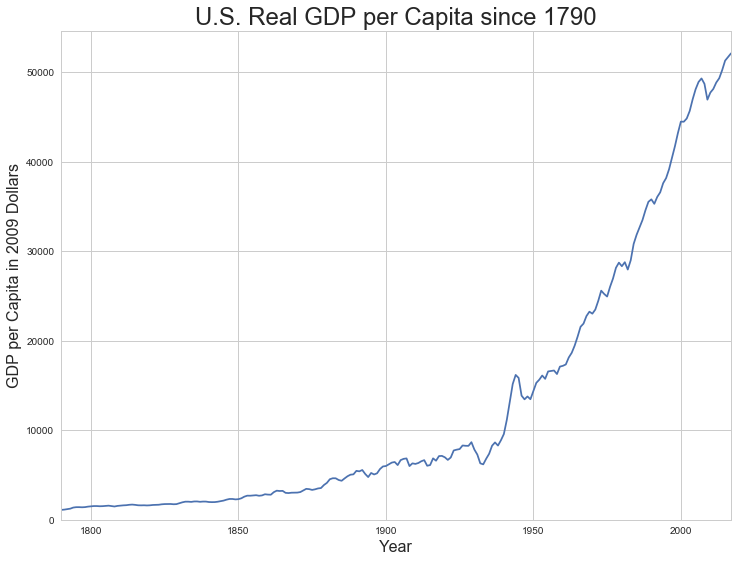

In [14]:
# U.S. long run economic growth of real GDP per capita: level plot
# From Sam Williamson and Louis Johnston, Measuring Worth

uslongrun_df.Real_GDP2009_per_Capita.plot()
plt.ylim(0, )
plt.ylabel("GDP per Capita in 2009 Dollars", size=16)
plt.xlabel("Year", size=16)
plt.title("U.S. Real GDP per Capita since 1790", size = 24)

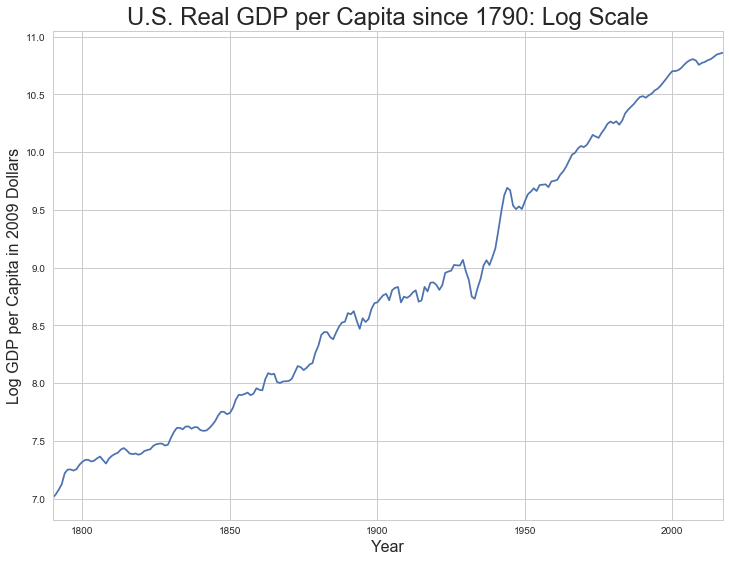

In [13]:
# U.S. long run economic growth of real GDP per capita: log plot
# From Sam Williamson and Louis Johnston, Measuring Worth

np.log(uslongrun_df.Real_GDP2009_per_Capita).plot()
plt.ylabel("Log GDP per Capita in 2009 Dollars", size=16)
plt.xlabel("Year", size=16)
plt.title("U.S. Real GDP per Capita since 1790: Log Scale", size = 24)

In [25]:
# U.S. long run economic growth of real GDP per capita
# memo: growth rate calculations
# From Sam Williamson and Louis Johnston, Measuring Worth

print(
    (np.log(uslongrun_df.Real_GDP2009_per_Capita[1860]/
    uslongrun_df.Real_GDP2009_per_Capita[1800])/(1860-1800)), 
    "GDP per Capita Growth Rate 1800-1860", "\n")

print(
    (np.log(uslongrun_df.Real_GDP2009_per_Capita[1929]/
    uslongrun_df.Real_GDP2009_per_Capita[1860])/(1929-1860)), 
    "GDP per Capita Growth Rate 1860-1929", "\n")

print(
    (np.log(uslongrun_df.Real_GDP2009_per_Capita[1973]/
    uslongrun_df.Real_GDP2009_per_Capita[1929])/(1973-1929)), 
    "GDP per Capita Growth Rate 1929-1973", "\n")

print(
    (np.log(uslongrun_df.Real_GDP2009_per_Capita[2016]/
    uslongrun_df.Real_GDP2009_per_Capita[1973])/(2016-1973)), 
    "GDP per Capita Growth Rate 1973-2016", "\n")

print(
    (np.log(uslongrun_df.Real_GDP2009_per_Capita[1995]/
    uslongrun_df.Real_GDP2009_per_Capita[1973])/(1995-1973)), 
    "GDP per Capita Growth Rate 1973-1995", "\n")

print(
    (np.log(uslongrun_df.Real_GDP2009_per_Capita[2006]/
    uslongrun_df.Real_GDP2009_per_Capita[1995])/(2006-1995)), 
    "GDP per Capita Growth Rate 1995-2006", "\n")


print(
    (np.log(uslongrun_df.Real_GDP2009_per_Capita[2016]/
    uslongrun_df.Real_GDP2009_per_Capita[2006])/(2016-2006)), 
    "GDP per Capita Growth Rate 2006-2016", "\n")

0.0103919658172 GDP per Capita Growth Rate 1800-1860 

0.0163007036874 GDP per Capita Growth Rate 1860-1929 

0.0246037598343 GDP per Capita Growth Rate 1929-1973 

0.016347568898 GDP per Capita Growth Rate 1973-2016 

0.0181660177872 GDP per Capita Growth Rate 1973-1995 

0.0225371248027 GDP per Capita Growth Rate 1995-2006 

0.00553846984655 GDP per Capita Growth Rate 2006-2016 



In [37]:
print(uslongrun_df.Real_GDP2009_per_Capita[1790])
print(uslongrun_df.Real_GDP2009_per_Capita[2016])
print(np.log(uslongrun_df.Real_GDP2009_per_Capita[2016]/uslongrun_df.Real_GDP2009_per_Capita[1790])/(2016-1790))
print(72/1.7)

1107.32
51690.0
0.0170058480429
42.35294117647059


In [41]:
print(uslongrun_df.Real_GDP2009_per_Capita[1800], ": 1800")
print(uslongrun_df.Real_GDP2009_per_Capita[1860], ": 1860")
print(uslongrun_df.Real_GDP2009_per_Capita[1929], ": 1929")
print(uslongrun_df.Real_GDP2009_per_Capita[1973], ": 1973")
print(uslongrun_df.Real_GDP2009_per_Capita[2016], ": 2016")

1509.06 : 1800
2815.12 : 1860
8669.0 : 1929
25593.0 : 1973
51690.0 : 2016


----

&nbsp;

## 5.2.1.1 American Growth, 1800-1860 

Even in the first half of the nineteenth century—the period in which the British Industrial Revolution made it the wonder of the world—economic growth in the United States was proceeding faster than in Britain. While British real GDP per capita was increasing at less than 0.6 percent per year, American was growing at a hair over one percent per year. And a significantly larger share of GDP was going to the working class in the United States north at least: the extraordinary abundance of land and the possibility of "lighting out for the territory", in the words of American author Mark Twain, gave even workers without property or notably scarce skills substantial economic bargaining power.

Efficiency of labor growth of about 1 percent per year...

We said "in the United States north at least". The slavery dominated south was different...

----

&nbsp;

## 5.2.1.2 American Growth, 1860-1929

1860—the start of the U.S. Civil War that killed 700,000 out of the 7.5 million adult men in the country—is a good point to choose as a breakpoint in analyzing long-run American economic growth. Before the Civil War the economy had been primarily agrarian and expansionist. But with the coming of the Civil War demand for industry received a huge positive shock: wars are expensive things, and modern wars are great industrial enterprises, and the U.S. Civil War was in many respects the first modern war. From 1860 to 1929 the United States became a land of cities and manufacturing plants much more than one of farmers and their farmsteads.

As the United States became an industrial economy, growth accelerated.  in the years before and after the Civil War was faster than it had been in the first half of the nineteenth century. It accelerated still further as a second wave of industrialization took hold, fueled by new inventions and innovations such as steel making, organic chemicals manufacture, oil extraction, the internal combustion engine, pasteurization, the typewriter, the cash register, and the telephone. The accelerated pace of invention and economic growth has been maintained ever since.

Late-nineteenth-century efficiency of labor growth was, by our standards, relatively slow: about 1 percent per year, little if any faster than over 1800-1860. But the 1860-1929 period appears to have involved substantial _capital deepening_: an upward jump to a new balanced growth path associated with a higher steady-state balanced-growth capital-output ratio.

1.6 percent per year GDP per capita growth. How much driven by capital deepening?

alpha = 1/2
2.5 to 4 in K/Y
That is an inrease of 60%

 mightily as America ceased being a country of riverboats and blacksmiths and became a country of railroads and steel mills. Once the railroads were built, the possibility of supplying an entire continental market from a large factory induced the entre  preneurs and robber barons (or is that “industrial statesmen”?) of what Mark Twain called America’s Gilded Age to borrow and invest. On the other side of the capital market three important factors greased the skids and made it easy for Americans to boost their savings: the development of larger and better banks, the growing use and acceptability of bonds and other securities as forms of wealth, and the development of investment banking houses like Peabody-Morgan and then J. P. Morgan to make a market by assuring business investors that the financing for expansion would be there and assuring savers that their money would not be stolen.1 Similar patterns of growth in labor productivity driven for a couple of generations by the mobilization of savings and a resulting increase in the capital-output ratio have been seen in other times and places: Germany before World Wars I and II, Japan from 1900 to 1970, and the rest of east Asia in the years since World War II.
 
But, as Chapter 4 argued, eventually the capital-output ratio reaches an equi  librium value, no matter how large the boost to the national saving-investment rate. And further growth depends not on increasing capital intensity but on increases in the efficiency of labor: education, invention, and reorganization.

----

&nbsp;

## 5.2.1.3 American Growth, 1929-1973

Throughout the nineteenth century and the first three-quarters of the twentieth cen  tury the measured pace of productivity growth continued to accelerate. The measured growth rate of output per worker rose from perhaps 0.5 percent per year between 1800 and 1870 to about 1.5 percent per year between 1870 and today. Growth has not been steady over that 135-year period. The growth rate was about 1.6 percent per year between 1870 and 1929 (the eve of the Great Depression), as is shown in Figure 5.5. Growth slowed slighdy during the Great Depression and World War II decades — a measured growth rate of 1.4 percent per year from 1929 to 1950. But then it acceler  ated: The growth rate of output per worker between 1950 and 1973 in the United States was 2.1 percent per year. Next to none of the growth since 1929 was the result of increases in KJY. Almost all of it was the result of increases in the efficiency of labor E. At least, that is what our best estimates of long-run economic growth tell us.

0.0246037598343 GDP per Capita Growth Rate 1929-1973 

----

&nbsp;

## 5.2.1.4 American Growth, 1973-2016

A more confused picture is painted by American growth after 1973. To start with, from 1973-1995 there was a marked slowdown in American prodcutivity growth. Measured per capita income growth fell from the 2.46 percent per year average over 1929-1973 to 1.82 percent per year over 1973-1995. This was even more alarming because withe the coming of feminism and the aging into working years of the baby boom generation the share of Americans at work rose substantially: the adult employment-to-population ratio rose from 58 to 63 percent. Thus, comparing 1973-1995 with 1929-1973, output per worker growth slowed by a full percentage point per year—much more than the 0.45 percentage points per year of output per capita. This productivity slowdown was the first major hiccup in what had been an accelerating trend of American economic growth since its founding. Not even the Great Depression had left a permanent mark.

The productivity slowdown era of 1973-1995, however, was then followed by a productivity boom: the new economy era of 1995-2006, during which Silicon Valley and its associated information and communications industries reached critical mass, and measured productivity growth reattained its 1929-1973 pace. 

That optimism, however, was short lived: the coming of the financial crisis of 2009 and the subsequent slow recovery dealt a major and permanent blow to the American economy. Since 2006 U.S. output per capita has grown at only 0.55 percent per year—1.7 percentage points per year slower than 1995-2006. Measured real output today is 17 percent lower than a reasonable but optimistic forecast made in 2006 would have predicted. And there is no sign that any of this latest growth slowdown will ever be recovered via any kind of long run bounceback to the previous trend.

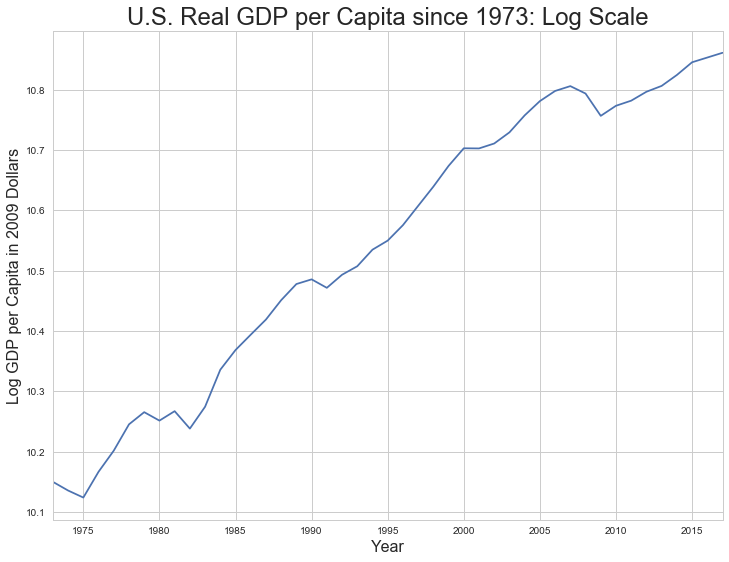

In [40]:
# U.S. long run economic growth of real GDP per capita: log plot
# From Sam Williamson and Louis Johnston, Measuring Worth

np.log(uslongrun_df.Real_GDP2009_per_Capita[183:]).plot()
plt.ylabel("Log GDP per Capita in 2009 Dollars", size=16)
plt.xlabel("Year", size=16)
plt.title("U.S. Real GDP per Capita since 1973: Log Scale", size = 24)

## 5.2.2 Problems of Measuring Economic Growth

But should we believe what our best official and semiofficial estimates tell us? Perhaps not. Many economists believe that official estimates overstate inflation and understate real economic growth by 1 percent per year, in large part because national income accountants have a very hard time valuing the boost to produc  tivity and standards of living generated by the invention of new goods and serv  ices. This was the conclusion reached by a blue-ribbon commission on consumer price measurement in the 1990s that was chaired by Stanford economist Michael Boskin. It is indeed very likely that true output-per-worker growth since 1870 has been even faster than our official statistics tell us. So for the average rate of output- per-worker growth in the United States since 1870, perhaps we should be think  ing not of 1.5 percent per year, but rather of 2 to 2.5 percent per year.

Small differences in growth rates compounded over long periods of time make a huge difference. If Michael Boskin and his committee members are right (as we believe that they are), then those of us living in the United States today have a level of productivity — a material standard of living — somewhere between 14 and 25 times that of our counterparts in the late nineteenth century. For middle-class and richer consumers today such an estimate does not seem at all unreasonable. It takes only one-eighth as much time to earn the money to buy a hairbrush, one- twelfth as much time to earn the money to buy a chair, and one-thirty-fifth as much time to earn the money to buy a book today as it did in 1895 (see Table 5.2). And in 1895, no matter how long you worked, you couldn’t earn enough money to buy a plane ticket, a TV, an iPod, a laptop computer, an automatic washing machine, an electric blender, or a microwave oven.

----

&nbsp;

As it sometimes was. 

Every student of American history should read Charles Francis Adams’s _Chapters of Erie_, if only to marvel at the variety of financial frauds perpetrated by the executives of the Erie Railroad.

**Glossary**:

**Productivity growth**: The rate at which the economy's full-employment productivity expands from year to year as technology advances, as human capital increases, and as investment increases the economy's physical capital stock.

----

&nbsp;

FIGURE 5.5 U.S. Measured
Economic Growth: Real GDP per Worker, 1870-2004
With the exception of the Great Depression of the 1930s and the productivity growth slowdown period of the 1970s and 1980s, measured real GDP per worker in the United States has grown steadily with only minor interruptions.

###### Source: Authors' calculations from the 2004 edition of The Economic Report of the President (Washington, DC: Government Printing Office) and from Historical Statistics of the United States (Washington, DC: Government Printing Office, 1975).

----

&nbsp;



Consider that Nathan Meyer Rothschild — the richest man in the world in the first half of the nineteenth century — died in his fifties of an infected abscess in his back. Who is really richer, Nathan Meyer Rothschild in his day or a working-class Ameri  can today who can go to a Kaiser Permanente clinic and get some penicillin? Who has a higher standard of living: a nineteenth-century robber baron with box seats to the theater to see The Importance of Being Earnest or a twenty-first-century American teenager ordering DVDs online from Netflix? Thinking about truly long run economic growth leads you to ask such questions, and the benefit is not in getting a single num  ber as an answer but in thinking about what an answer might mean.

However, for the relatively poor of the world, or even of the United States, it is not reasonable to say that their incomes and material standards of living have mul  tiplied to nearly as great an extent as those of America’s great middle class. An invention or innovation has no effect on people’s material standard of living if they cannot afford to acquire it. The ability to fly from Minneapolis to Cancun in the middle of the winter is a very valuable thing, but only if you can afford to fly to Cancun.

----

&nbsp;

TABLE 5.2
Labor-Time Costs of Commodities, 1895 and 1997
Commodity
Horatio Alger books (6 vols.) One-speed bicycle Cushioned office chair 100-piece dinner set Hairbrush
Cane rocking chair
Solid gold locket Encyclopaedia Britannica Steinway piano
Sterling silver teaspoon Oranges (dozen) Ground beef (1 lb.) Milk (1 gal.)
Television
Plane ticket: SFO-BOS Antibiotic strep-throat cure Dental X-ray
Laptop computer
Time to Earn (Hours)
1895 1997
21.0 0.6 260.0 7.2 24.0 2.0
Productivity | Multiple j
35.0 j 36.1 j 12.0 |
OO :

Time needed for an average worker to earn the purchase price of the commodity. Source: 1895 Montgomery Ward catalogue and authors' calculations.
5.2 Modern American Economic Growth
44.0 3.6 12.2
16.0 2.0 8.0 1.6 28.0 6.0 140.0 4.0 2,400.0 1,107.6
8.0 j 5.0 I 4.7 j
35.0 j 2.2 j
26.0 34.0 0.8 2.0 0.1 20.0
0.8 0.2
4.0 j
2.0 0.25
oo 15.0
oo 20.0 oo oo 1.0
oo 2.0 OO oo 70.0 OO
8.0 | OO j

----

&nbsp;

Structural Change

Modern economic growth is also a shift in the kinds of things we do at work and play — in the way that we live. In the immediate aftermath of the Civil War per  haps half of all Americans were farmers. Today less than 2 percent of American workers are farmers and farm laborers; there are more gardeners, groundskeepers, and growers and maintainers of ornamental plants in the United States today than there are food-growing farmers and farm laborers. In the second half of the nine  teenth century Americans traveled by foot, horse, wagon, train, and riverboat; at the end of the twentieth century, they traveled by foot (rarely), bicycle (rarely), automobile, bus, train, boat, and plane. Most Americans in the second half of the nineteenth century were literate, but very few had finished anything equivalent to today’s high school. Modern economic growth is the large-scale shift of employ  ment from agriculture to manufacturing and now to services. And it is the cre  ation of large business organizations. At the start of the nineteenth century, a busi  ness with 100 people was a very large organization for its time.

----

&nbsp;

America's Edge

Between approximately 1890 and 1930, or perhaps 1890 and 1950, a host of inno  vative technologies and business practices were adopted in the United States. Euro  peans speak of “Fordism”: taking the part — Henry Ford’s assembly lines in Detroit and his mass production of the Model-T Ford — for the whole. The fact that other industrial economies were unable to fully adopt American technologies of mass production and mass distribution in the first half of the twentieth century gave the United States a unique level of industrial dominance and technological leadership in the years after 1950.

This acceleration in American economic growth that placed America ahead of the rest of the industrialized countries seems, in the framework of Chapter 4, to have had two components. The first was a rise in America’s investment effort pro  pelled in part by the fact that more capital-intensive production processes — processes with a higher capital-output ratio — seemed more likely to be profitable in America, where you were serving a continent-sized market, than in Europe, where tariffs, language barriers, and other impediments to trade kept most pro  duction local and national. At some point in the late nineteenth and early twenti  eth centuries the American economy underwent what the late Stanford economist Moses Abramovitz and his colleague Paul David called a “great traverse” to a more capital-intensive growth path. This drive to a more capital-intensive growth path was also propelled, as Gavin Wright (yet a third Stanford economist) pointed out, by the extraordinary richness of the natural resource deposits discovered as the American continent was surveyed in the late nineteenth century.

The second component is the turn-of-the-last century acceleration in the rate of growth of the efficiency of labor, which in turn comes from two sources: the cre  ation of the managerial and organizational structure of the modern corporation, on the one hand, and the routinization and industrialization of science and technol  ogy, on the other. When businesses began to spend serious money on their own research and development laboratories, the pace of technological innovation and thus of growth in the efficiency of labor sped up.

Why couldn’t Great Britain, or the other industrial countries, maintain their lead or even keep up? Why was the twentieth century economically — and therefore also politically — an American century? Why didn’t western Europe have its own Henry Ford, its own industrial R&D labs, and so forth?

Four factors appear to explain America’s position at the leading edge of tech  nology in the world economy throughout the twentieth century:

1. The United States had an exceptional commitment to education — to school 
ing everyone (everyone who was white, that is; and boys more than girls) even in the largely rural economy of the nineteenth century and to making the achievement of a high school diploma the rule rather than the exception in the cities of the early twentieth century. An exceptionally educated work  force was the source of new ideas about how to make a better mousetrap, and it could quickly copy and adapt others’ ideas as well.

2. The United States was of extraordinarily large size — the largest market in the world. Thus the nation could take advantage of potential economies of scale in ways that other, smaller economies could not match. And this mattered for capital intensity.

3. The United States was extraordinarily rich in natural resources, particularly energy. To the extent that energy-intensive and natural resource-intensive industries were at the heart of early-twentieth-century industrial growth, the United States was again well positioned. By contrast, western Europe had been mined over and logged for at least a millennium.

4. The United States avoided fratricide. Europeans killed each other and destroyed each other’s buildings and factories (and we helped) at a historically unprecedented rate in the first half of the twentieth century. Your chances of meeting a violent or unnatural death in Europe between 1914 and 1945 were greater than in any other generation we know of except perhaps for those in the paths of the armies of Genghis Khan.

In the long run, however, western Europe did catch up to the United States. There is little difference in standards of living and productivity levels between western Europe and the United States today. Americans have somewhat more things and bigger houses but work longer hours and have fewer public services; Europeans have longer vacations and better public transportation but fewer opportunities to work and a harder time living in the suburbs.

Up until 1973, with the important exception of the Great Depression, the picture of American economic growth since the Industrial Revolution seemed to be one of increasing progress at an increasing rate. The rate of increase in the efficiency of labor had jumped upward with the original Industrial Revolution, and it had jumped upward again with the coming of modem science and technology and the industrial R&D laboratory. The capital intensity of the economy had increased as businesses had sought to exploit the continent-sized market by grasping for economies of scale.

But then came 1973, and American economic growth hit a large speed bump.

----

&nbsp;

American Economic Growth 1973-1995: The Productivity Growth Slowdown

In 1973 the steady trend of climbing rates of productivity growth stopped cold. Between 1950 and 1973 the rate of labor productivity growth in the United States was 2.1 percent per year. Between 1973 and 1995 measured growth in output per worker in the U.S. economy grew at only 0.6 percent per year. The slowdown did not affect the U.S. economy alone: It hit — to different degrees and with different effects — the other major economies of the world’s industrial core in western Europe, Japan, and Canada as well (see Table 5.3 on page 134).

What caused the productivity growth slowdown? Various observers at different times have attributed this slowdown in the growth rate of productivity to four dif  ferent factors: increased problems of economic measurement, environmental pro  tection expenditures, the baby boom, and oil prices.

The first two of these are really the same thing. The argument that the productivity growth slowdown can be explained by expenditures on environmental protection is a branch of the “problems-of-measurement” argument, and it is by far the most important branch of that argument. When the price of electricity goes up because power companies switch to burning higher priced low-sulfur coal or install sulfur-removing scrubbers in their chimneys, they are producing not just electric power but electric power plus cleaner air. But the NIPA does not count pollution reduction as a valued economic output. America has spent a fortune on environmental protection in the past generation, and it has received big benefits from this investment. But these gains aren’t included in measured GDP.
The surge in investment in environmental protection in the United States started just about when the productivity growth slowdown did. Nevertheless, the argument
productivity growth slowdown

The period from 1973 to about 1995 when the rate of productivity growth in the United States and other economies suddenly slowed, for still mysterious reasons.

----

&nbsp;

TABLE 5.3
The Magnitude of the Post-1973 Productivity Growth Slowdown in the G-7 Economies
}
j Country
| United States Canada
Japan
Britain
Germany (West)
; France i Italy
Output-per-Worker Annual Growth (%)
1950-1973
1973-1995
2.1 0.6 2.7 1.6 7.4 2.6 2.4 1.8 5.7 2.0 4.4 1.5 4.9 2.3

######Source: Authors' calculations from the 2004 edition of The Economic Report of the President (Washington, DC: Government Printing Office).

----

&nbsp;

that this can be the full rather than a partial and relatively small part of the explanation is difficult to win. The math doesn’t seem to add up: The productivity growth slowdown we have experienced seems to be multiple times the size of the one that would have been expected from the redirection of investment from increasing productive capacity to environmental protection.

Aside from the failure to measure the benefits of pollution control, the rest of the argument that the productivity growth slowdown can be explained by prob  lems of economic measurement is a bit too subtle to work. Few doubt that eco  nomic measurement entails big problems. These problems can reasonably be assumed to lead to significant understatements of the rate of economic growth. But to account for the productivity growth slowdown, the problems of measurement must have gotten worse. They must be much worse now than they were five decades ago. And how that can be true is not clear.

The third proposed explanation of the productivity growth slowdown is that in the 1970s the baby-boom generation of Americans began to enter the labor force. This generation is very large. We should know: Brad was bom in 1960, the year in which more Americans were born than in any year either before or since. The relatively young labor force had many more workers with little experience than did the labor force of the 1960s and 1950s. Some economists argue that this fall in the average level of labor-force experience generated the productivity growth slowdown. Others point out that the baby-boom generation had little experience but a lot of education, and that in the past education had been a powerful booster of productivity. The average level of education in the labor force increased quite rapidly as the baby-boom gener  ation entered the economy. Once again, this is an unlikely full explanation: Entry of the baby boomers into the labor force may be part of the answer, but the combina  tion of their low experience and their high education makes it hard to sell the entry of the baby-boom generation as a large net reduction in labor-force quality.

The last explanation of the productivity growth slowdown is the tripling of world oil prices by the OPEC cartel in 1973, in the wake of the third Arab-Israeli war. Pro  ductivity growth slowed at almost exactly the same time that oil prices skyrocketed. Economists hypothesized that in response to the tripling of world oil prices firms began redirecting their capital expenditures from capital that produced more out  put to capital that used less energy; firms retired a large share of their most energy- intensive capital and began to substitute workers for energy use wherever possible.

The problem with this explanation is twofold. First, since 1986 real oil prices have been lower than they were before 1973; hence the productivity growth slow  down should have ended in the late 1980s, but it didn’t. Second, energy costs are not that large a share of the typical business’s costs. By the start of the 1990s the productivity growth slowdown had left America with real GDP levels about a quar  ter lower than they would have been had productivity growth continued at its pre- 1973 rate. How could even the tripling of the price of a commodity that accounts for less than 4 percent of costs lead to a more than 25 percent reduction in out  put? Thus it is hard to see the oil price increases of the 1970s as a full accounting.

That an event as important as the productivity growth slowdown that started in the early 1970s remains so mysterious is extremely frustrating to economists. The causes of the productivity growth slowdown remain uncertain. The best theory combines all the others — the “a lot of different bad things happening all at once” theory. But it remains unsatisfactory.

----

&nbsp;

Effects of the Productivity Growth Slowdown

At a productivity growth rate of 2.1 percent per year — the rate the United States enjoyed from 1950 to 1973 — output per worker doubles every 34 years. At the 1973-1995 growth rate of 0.6 percent per year, output per worker takes 120 years to double — three and a half times as long. Social psychologists tell us that 40-year- olds feel happiest not when their incomes are high but when their incomes are high relative to those of their households when they were growing up. Before 1973, when growth in output per worker was more rapid, most American voters felt much richer than their parents and hence were more willing to invest in social welfare programs and other liberal political initiatives. Between 1973 and 1995, slower growth made Americans feel much less well off than they had expected they would be.

Economic growth slowed sharply as a result of the productivity growth slow  down. But whether economic growth stopped for large numbers of Americans is not clear. Box 5.2 analyzes what we know about the “true” pace of economic growth during the productivity growth slowdown. The consequences of this are uncertain: Former president Jimmy Carter saw it as the origin of a national “malaise.” Liberals have blamed it for a rightward shift in politics. American con  servatives have blamed it for a rush to security and an unwillingness to undertake bold libertarian experiments. All have seen it as a cause of more (not necessarily unjustified) skepticism toward the government and its programs.

----

&nbsp;

Box: DID REAL STANDARDS OF LIVING DECLINE DURING THE SLOWDOWN PERIOD? THE DETAILS
For some categories of workers (e.g., males in their twenties with less than a high- school diploma), the productivity growth slowdown of roughly 1973 to 1995 was accompanied by stagnant or declining measured real wages. Yet offsetting this are many improvements in quality of life — from cleaner air to the convenience of automated teller machines — that the national income accounting system cannot measure.

If we accept the estimates of the mid-1980s Boskin Commission (chaired by economist Michael Boskin), we conclude that unmeasured growth in material well  being is greatly uncertain but somewhere around 1 percent per year. If this is correct, then true total product-per-worker growth in the United States has slowed not to the 0.6 percent per year recorded in official statistics for 1973-1995 but to 1.6 percent per year. This is still a substantial drop from the estimated 3.1 percent per year that the same adjustment produces for growth before 1973.

And increased income inequality has produced declines in real income or near stagnation for some groups (see Figure 5.6). But it is not true that America’s output per worker stagnated for all workers over the two decades before 1995. Whether we as a society have distributed the gains in productivity to persons and households and to private and public uses wisely and appropriately — that is another question.

----

&nbsp;

FIGURE 5.6
Measured Real Mean Household Income, by Quintile The era of the produc  tivity growth slowdown saw not just slow economic growth but a widening of the American distribution of income.

###### Source: Economic Policy Institute, www.epinet.org/.

----

&nbsp;

Productivity Growth Speedup: The New Economy

As computers improved and spread throughout the U.S. economy in the 1970s and 1980s, economists kept waiting to see the wonders of computing show through in national productivity. But that didn’t happen. The productivity growth slowdown continued throughout the 1970s and 1980s. This surprising phenomenon came to be called the “computer paradox” after Robert Solow’s famous 1987 observation: “We see the computer age everywhere except in the productivity statistics.” Since 1995, however, labor productivity growth in the American economy has accelerated once again, first to a pace of 2.1 percent per year in the second half of the 1990s, and now to a pace of 3.5 percent per year so far in the first half of the 2000s.

The U.S. economy has benefited from a stunning investment boom since 1992. Between 1992 and 1998 real GDP rose by an average of 3.6 percent per year, and business fixed investment soared at a 10.1 percent average rate, almost three times as fast. As a consequence, the share of business fixed investment in GDP jumped from 9.2 percent to 13.2 percent, with much of the additional invest  ment going into computers and related equipment. The consensus among econ  omists is that the recent acceleration in productivity growth resulted from this boom in real investment, a huge share of which was driven by the rapidly falling price of computers. According to the Commerce Department’s Bureau of Eco  nomic Analysis, the price of computing equipment fell by an average of 19 per  cent per year between 1990 and 2003. Each year the same nominal expenditure on computers bought 19 percent more in terms of real computer equipment.

Consensus opinion was tipped into believing that the post-1995 reversal of the productivity growth slowdown was a durable phenomenon by the fact that pro  ductivity growth in America despite falling somewhat during the short business- cycle recession of 2001, continued to be quite rapid throughout the period of uneven business-cycle recovery that followed in 2002, and the faster period of recovery in 2003 and 2004 as shown in Figure 5.7. The normal business cycle pattern is for productivity growth to be slow — not fast — during a recession. This normal pattern did not hold, as businesses used investment in high-tech equip  ment to continue to boost their productivity even when the labor market was a buyer’s market.

----

&nbsp;

FIGURE 5.7
Two-Year Growth Rates in Labor Productivity Trend productivity growth was low throughout the late 1970s, 1980s, and early 1990s, with the only hopeful news about pro  ductivity coming in the early stages of business- cycle recoveries. By con  trast, in the late 1990s and early 2000s the news about labor productivity was good no matter what the phase of the business cycle.
 Year 
 
 ###### Source: Authors' calculations from data available at www.bls.gov.

----

&nbsp;

A rapidly falling price of capital goods has the same effect on total investment as a rapidly rising saving rate. We know that the higher is the share of national product devoted to saving and gross investment — the higher is s — the higher will be the economy’s balanced-growth capital-output ratio s/(n + g + 8). The same thing applies to falling prices of capital goods — in this case, the falling prices of information technology and communications equipment. Halve the price of capi  tal goods, and you will find that in the long run you have doubled the economy’s capital intensity — doubled its average ratio of capital to output — with important consequences for the level of output per worker.

One way to think about it is that, as long as the technological revolution in information technology continues and the price of computers and related goods keeps falling at an astronomical rate, the United States is undergoing a new “great traverse” — only this time it is not to a growth path with a higher ratio of indus  trial capital like steel mills to output, but to a growth path with a higher ratio of information capital like computer chips to output.

There is every reason to expect that technological progress in the computer and communications sectors will continue, and there is every reason to expect that these useful technologies will continue to diffuse throughout the economy. The best bet in forecasting future productivity growth is to make future projections on the basis of what has happened in the past half-decade. The productivity growth slowdown has been brought to an end by the technological revolution in comput  ers and communications. But that is a subject to be explored further toward the end of this book, in Chapter 16.

----

&nbsp;

RECAP MODERN AMERICAN ECONOMIC GROWTH

Over the past two centuries measured economic growth in the United States has raised output per worker at an average pace of between 1.5 and 2.0 percent per year. Moreover, it is likely that true output-per-worker growth since 1890 has been even faster. Many economists believe that official estimates overstate inflation and understate real economic growth by 1.0 percent per year, in large part because national income accountants have a very hard time valuing the boost to productivity and standards of living generated by the invention of new goods and services, and new types of goods and services.

Accompanying this increase in productivity and living standards is structural change: the move from the country to the city, the large-scale shift of employ  ment from agriculture to manufacturing and now to services, and the creation of large business organisations. Starting in 1973 the steady trend of climbing rates of productivity growth stopped cold: Between 1973 and 1995 measured growth in output per worker in the U.S. economy grew at only 0.6 percent per year. Since 1995, however, productivity growth in the American economy has accelerated once again to a pace of 2.7 percent per year, the result of an investment boom, the rapidly falling prices of computers and communications equip  ment, and technological advances.

----

&nbsp;

Figure legends...

FIGURE 5.1
World Population Growth since 1000 The growth of human population was very slow until approximately 1800. The boom in population since 1800 is called, not surprisingly, the popula  tion explosion.

FIGURE 5.2
Stylized Picture of the Demographic Transition
The demographic transi  tion sees, first, a rise in birth rates and a sharp fall in death rates as material standards of living in  crease above subsistence levels. But after a while birth rates start to decline rapidly too. The end of the demographic transi  tion sees both birth and death rates at a relatively low level and the popula  tion nearly stable.

FIGURE 5.3 Expected Population Growth Rates, Present-2020
The population of India
is projected to grow at
1.3 percent and that of China at 0.7 percent per year over the next gene  ration. Demographers today believe that the world population has at most one more doubling to undergo before the de  mographic transition will have taken hold through  out the world.

FIGURE 5.4 Industrializing Areas
of the World, 1900 Perhaps the most impor  tant lesson to draw from this short look at eco  nomic history is that econ  omists' standard growth models apply to a rela  tively narrow slice of time. For instance, the Solow growth model discussed in Chapter 4 does not illu  minate very much regard  ing the period before 1800, yet it is very useful in analyzing what has hap  pened over the past two centuries, as well as what is going on today with re  spect to the growth of dif  ferent national economies.

FIGURE 5.5 U.S. Measured
Economic Growth: Real GDP per Worker, 1870-2004
With the exception of the Great Depression of the 1930s and the productivity growth slowdown period of the 1970s and 1980s, measured real GDP per worker in the United States has grown steadily with only minor interruptions.

Two-Year Growth Rates in Labor Productivity Trend productivity growth was low throughout the late 1970s, 1980s, and early 1990s, with the only hopeful news about pro  ductivity coming in the early stages of business- cycle recoveries. By con  trast, in the late 1990s and early 2000s the news about labor productivity was good no matter what the phase of the business cycle.

FIGURE 5.8 World Distribution
of Income, Selected Countries
In some places modern economic growth has taken hold and propelled
levels of productivity and living standards upward.
In other places people on average live little, if any, better than their ancestors did. The world is a more unequal place, in relative income terms, than it has been since there were some human tribes that had fire and others that did not.

FIGURE 5.9 Convergence among
the G-7 Economies: Output per Capita as a Share of U.S. Level
In 1950 GDP per capita levels in the six nations that now are America's partners in the G-7 varied from 20 percent of the U.S. level (Japan) to
70 percent of the U.S.
level (Canada). Today estimates of GDP per capita place levels in all six at more than 65 percent
of the U.S. level — and they would be even closer to the U.S. level if the measurements took account of the shorter average work year abroad.

FIGURE 5.10 GDP-per-Worker Levels
and Average Years of Schooling
Countries with a high number of average years of schooling have a better chance of being relatively well off. Education opens the door to acquiring the
technologies of the Indus  trial Revolution.


#### GLOSSARY:

**Industrial Revolution**: The transformation of the British economy between 1750 and 1850 when, due to technological advances, largely handmade production was replaced by machine-made production.

**Malthusian age**:
A period in which natural-resource scarcity limits any gains from increases in technology; a larger population becomes poor and malnourished, lowering their standard of living, and ultimately lowering population growth to near zero.

**Demographic transition**: A period in history which sees first a rise and then a fall in birth rates and a sharp fall in death rates as material standards of living increase above "subsistence" levels.

**Productivity growth**: The rate at which the economy's full-employment productivity expands from year to year as technology advances, as human capital increases, and as investment increases the economy's physical capital stock.

**Productivity growth slowdown**: The period from 1973 to about 1995 when the rate of productivity growth in the United States and other economies suddenly slowed, for still mysterious reasons.

**divergence**: The tendency for a per capita measurement such as income or standard of living in various countries to become less equal over a period of time.

**patent laws and copyrights**: Laws designed to encourage invention and innovation
by providing the right to exclude anyone else from using a discovery (patent)
or intellectual property (copyright) for a period of years.

----

**Balanced-growth path**: The path toward which total output per worker tends to converge, as the capital-output ratio converges to its equilibrium value.

**Capital intensity**: The ratio of the capital stock to total potential output, K/Y, which describes the extent to which capital, as opposed to labor, is used to produce goods and services.

**Efficiency of labor**: The skills and education of the labor force, the ability of the labor force to handle modern technologies, and the efficiency with which the economy's businesses and markets function.

**Long-run economic growth**: The process by which productivity, living standards, and output increase.

**Saving rate**: The share of total GDP that an economy saves, s, equal to the sum of household, government, and foreign saving divided by total output.

----

&nbsp;

<https://github.com/braddelong/LSS18E101b/blob/master/m%26O3ed/ch5/2018-02-06_DeLong_and_Olney_Macro_3rd_Ch_5.2%20Modern%20Economic%20Growth%20in%20America.ipynb> <https://tinyurl.com/dl20180226d>

----

<http://datahub.berkeley.edu/user-redirect/interact?account=braddelong&repo=LSS18E101b&branch=master&path=m%26O3ed/ch5/2018-02-06_DeLong_and_Olney_Macro_3rd_Ch_5.2%20Modern%20Economic%20Growth%20in%20America.ipynb> <https://tinyurl.com/d-l20180226e>